<a href="https://colab.research.google.com/github/JonatanSiracusa/Grupo_Financiero_Galicia_Intraday_Percentage_Change/blob/main/Grupo_Financiero_Galicia_Intraday_Percentage_Change.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Introducción al estudio: TRADING INTRADIARIO](#scrollTo=zqEVea5qMdNq)

>[Hipótesis a estudiar](#scrollTo=xsLB3BH-adJd)

>>[Inicio: carga de librerías, definición de Funciones y variables globales](#scrollTo=RzO8w1ysoR5P)

>>[Carga de datos](#scrollTo=N2ZT3qWIY_5c)

>>[Limpieza de datos](#scrollTo=KAjjl-EDoYZ_)

>>[Transformación de datos](#scrollTo=1Ht6Zro3oje8)

>>[Análisis](#scrollTo=2vs5OQgxZURk)

>>>[Seleccionamos nuestra muestra](#scrollTo=x060Yk9m-jwf)

>>>[Creamos un nuevo DataFrame de Variaciones Porcentuales y sus correspondientes Acumulados.](#scrollTo=3EQRv8bUNeuJ)

>>[Visualizaciones](#scrollTo=-oZALeyloq56)

>>>[Distribución de las Variaciones Porcentuales Intradiarias](#scrollTo=PxIgyv58YwNG)

>>>>[Promedios y Medidas de Dispersión](#scrollTo=Bb5clEyFRmd3)

>>>>[Distribución de ocurrencias](#scrollTo=LWMn7R74Zke-)

>[Conclusiones](#scrollTo=q7ppUWSYpA7A)

>>[Rango Porcentual Intradiario Total](#scrollTo=q7ppUWSYpA7A)

>>[Información útil para el Trader](#scrollTo=q7ppUWSYpA7A)



# Introducción al estudio: TRADING INTRADIARIO

El objetivo del presente estudio es entender con el mayor grado de certeza posible los rangos de variación porcentual intradiaria (muchas veces entendido, en términos nominales, como el rango) del precio de la cotización de una rueda respecto de la cotización de apertura de la misma rueda de la acción Grupo Financiero Galicia.

De esta forma, sería posible conocer el rango porcentual de variación del precio dentro de una misma rueda y qué potencial tiene la acción para la operatoria de "trading intradiario".

En el estudio se toman cotizaciones diarias, desde el año 1997 a 2022, al fin de cubrir variados eventos económicos, políticos y sociales que sucedieron en la Argentina y el mundo que, lógicamente, afectaron las cotizaciones de la acción a lo largo de tiempo.


#Hipótesis a estudiar


1) El rango total de precios entre los cuales oscila el precio de la acción durante una rueda varía dentro de determinadas variaciones porcentuales, respecto del precio de apertura, que pueden determinarse.

## Inicio: carga de librerías, definición de Funciones y variables globales

In [20]:
# Importo las librerías que se van a necesitar
import pandas as pd
import numpy as np
from numpy import log as ln
from scipy import stats
from scipy.stats import norm
import statistics as st


# Declaro las variables globales
DIAS_V_H = 40
RUEDAS_POR_ANIO = 252
FECHA_INICIO_MUESTRA = '1997-01-01'
FECHA_FIN_MUESTRA = '2099-01-01'
NIVEL_SIGNIFICACION = 0.05
FECHA_VENC_EJERCICIOS = ['2022-04-15', '2022-06-17']


# Escribo las funciones que serán usadas durante el estudio:

def tomar_muestra_df(df, fecha_inicio, fecha_fin='2099-12-31'):
  """ Esta funcion toma las filas del DF que se encuentran entre fecha_inicio y
      fecha_fin
  """

  mask = ((df['fecha_date'] >= fecha_inicio) & (df['fecha_date'] <= fecha_fin))
  return df.loc[mask]


def volatilidad_historica(dias_vh, fecha_ultimo_cierre, dias_calendario = RUEDAS_POR_ANIO):
  """ Esta función calcula la Volatilidad Histórica de una activo financiero y retorna
      el valor expresado en porcentaje (ya que los valores de 'var_cierre_porcentual' tmb).
  """

  indice_fecha_fin  = int(df[df['fecha_date'] == fecha_ultimo_cierre].index[0])
  indice_fecha_inicio = indice_fecha_fin - dias_vh

  if (indice_fecha_fin - indice_fecha_inicio) < dias_vh:
    return "ERROR"
  else:
    fecha_inicio = df['fecha_date'][indice_fecha_inicio]

    mask = ((df['fecha_date'] > fecha_inicio) & (df['fecha_date'] <= fecha_ultimo_cierre))
    df_vh = df.loc[mask]

    values = np.array(df_vh['var_cierre_porcentual'])
    
    v_h = (st.stdev(values)) * (dias_calendario ** (1/2))
    return v_h


def copiar_cols_df(df_orig, df_nuevo, cols_orig, cols_nuevo):
  """ Esta funcion toma la columna del primer DF y copia todas las filas de la columna
      en el segundo DF.
      El parametro "cols_orig" y "cols_nuevo" puede ser una lista de columnas usando enteros.

      Args:
        df_orig (pandas object): el DF del cual se quiere copiar.
        df_nuevo (pandas object): el DF al cual se quieren copiar las columnas.
        cols_orig (int): es una lista con int que indican la columna que se quiere copiar.
        cols_nuevo (int): es una lista con int que indica la columna donde se quiere copiar.

      Returns:
        df_nuevo (pandas object): Retorna un DF con las  nuevas columnas copiadas.
  """

  for elem in range(0, len(cols_orig)):
    df_nuevo.iloc[:, cols_nuevo[elem]] = df_orig.iloc[ :, cols_orig[elem]]
  
  return df_nuevo


## Carga de datos

In [21]:
path = 'https://raw.githubusercontent.com/JonatanSiracusa/Grupo_Financiero_Galicia_Intraday_Percentage_Change/main/ggal.csv'

df_especie = pd.read_csv(path)

## Limpieza de datos

Del DataFrame con los datos de la población elimino columnas que no serán usadas en este estudio.

In [22]:
df_especie.drop_duplicates
del df_especie['volumen']
del df_especie['timestamp']

df_especie

,especie,fecha,apertura,maximo,minimo,cierre
0,GGAL,1991-01-02,0.02338,0.02338,0.02313,0.02338
1,GGAL,1991-01-03,0.02289,0.02289,0.02251,0.02289
2,GGAL,1991-01-04,0.02251,0.02289,0.02251,0.02251
3,GGAL,1991-01-07,0.02202,0.02202,0.02202,0.02202
4,GGAL,1991-01-08,0.02128,0.02177,0.02128,0.02128
...,...,...,...,...,...,...
7743,GGAL,2022-06-16,176.89999,181.00000,175.50000,177.14999
7744,GGAL,2022-06-21,178.00000,180.00000,175.30000,176.55000
7745,GGAL,2022-06-22,177.20000,179.35000,174.00000,175.80000
7746,GGAL,2022-06-23,175.39999,176.00000,169.70000,172.85001


Verifico la homgeneidad de los tipos de datos.

In [23]:
df_especie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7748 entries, 0 to 7747
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   especie   7748 non-null   object 
 1   fecha     7748 non-null   object 
 2   apertura  7748 non-null   float64
 3   maximo    7748 non-null   float64
 4   minimo    7748 non-null   float64
 5   cierre    7748 non-null   float64
dtypes: float64(4), object(2)
memory usage: 363.3+ KB


In [24]:
# Convierto 'fecha' str a 'fecha_date' datetime
df_especie['fecha'] = pd.to_datetime(df_especie['fecha'], format='%Y-%m-%d')
df_especie.rename(columns={'fecha': 'fecha_date'}, inplace=True)

df_especie

,especie,fecha_date,apertura,maximo,minimo,cierre
0,GGAL,1991-01-02,0.02338,0.02338,0.02313,0.02338
1,GGAL,1991-01-03,0.02289,0.02289,0.02251,0.02289
2,GGAL,1991-01-04,0.02251,0.02289,0.02251,0.02251
3,GGAL,1991-01-07,0.02202,0.02202,0.02202,0.02202
4,GGAL,1991-01-08,0.02128,0.02177,0.02128,0.02128
...,...,...,...,...,...,...
7743,GGAL,2022-06-16,176.89999,181.00000,175.50000,177.14999
7744,GGAL,2022-06-21,178.00000,180.00000,175.30000,176.55000
7745,GGAL,2022-06-22,177.20000,179.35000,174.00000,175.80000
7746,GGAL,2022-06-23,175.39999,176.00000,169.70000,172.85001


Verfico si hay datos erróneos dentro de la serie de datos y los corrijo.

In [25]:
# Visualizo si hay datos erróneos

mask = df_especie['maximo'] < df_especie['minimo']
df_especie.loc[mask]

,especie,fecha_date,apertura,maximo,minimo,cierre
5264,GGAL,2012-03-30,3.35,3.35,3.42,3.4


In [26]:
# Corregimos la fila

mask = df_especie['maximo'] < df_especie['minimo']
indice = df_especie.loc[mask].index

min = df_especie['maximo'][indice]
max = df_especie['minimo'][indice]
df_especie.loc[indice, 'minimo'] = min
df_especie.loc[indice, 'maximo'] = max

df_especie.iloc[indice, :]

,especie,fecha_date,apertura,maximo,minimo,cierre
5264,GGAL,2012-03-30,3.35,3.42,3.35,3.4


## Transformación de datos

Comenzamos con la transformación de los datos y posterior selección de la muestra a estudiar.

Decido calcular tanto el **"rango diario porcentual"**, el **"minimo diario porcentual"** y el **"maximo diario porcentual"**, respecto del precio de **"apertura"**. 

La razón es que los fines del presente estudio es generar información que sea de utilidad al **trading intradiario**. Al comienzo de la rueda el **único dato cierto es el precio de apertura**. 

Tambien es cierto el precio de cierre de la rueda anterior aunque, tomando el precio de cierre anterior, puede generarse información sesgada o no del todo objetiva, ya que pudo haber un gap en la apertura respecto del cierre anterior creando una distorsión en la información que buscamos generar.

In [27]:
# Agrego la variacion nominal respecto del cierre anterior.
df_especie['var_cierre_nominal'] = (df_especie['cierre'] - df_especie['cierre'].shift())

# Agrego la variacion porcentual respecto del cierre anterior.
df_especie['var_cierre_porcentual'] = ((df_especie['cierre'] / df_especie['cierre'].shift()) - 1 ) * 100

# Agrego el rango nominal = max del dia - min del dia
df_especie['rango_diario_nominal'] = df_especie['maximo'] - df_especie['minimo']

# Agrego el rango porcentual = (max del dia - min del dia) / apertura
df_especie['rango_diario_porcentual'] = ((df_especie['rango_diario_nominal'] / df_especie['apertura']) - 0) * 100

# Agrego el rango minimo porcentual = min del dia / apertura
df_especie['min_diario_porcentual'] = ((df_especie['minimo'] / df_especie['apertura']) - 1) * 100

# Agrego el rango maximo porcentual = max del dia / apertura
df_especie['max_diario_porcentual'] = ((df_especie['maximo'] / df_especie['apertura']) - 1) * 100

df_especie = df_especie.fillna(0)

df_especie

,especie,fecha_date,apertura,maximo,minimo,cierre,var_cierre_nominal,var_cierre_porcentual,rango_diario_nominal,rango_diario_porcentual,min_diario_porcentual,max_diario_porcentual
0,GGAL,1991-01-02,0.02338,0.02338,0.02313,0.02338,0.00000,0.000000,0.00025,1.069290,-1.069290,0.000000
1,GGAL,1991-01-03,0.02289,0.02289,0.02251,0.02289,-0.00049,-2.095808,0.00038,1.660114,-1.660114,0.000000
2,GGAL,1991-01-04,0.02251,0.02289,0.02251,0.02251,-0.00038,-1.660114,0.00038,1.688139,0.000000,1.688139
3,GGAL,1991-01-07,0.02202,0.02202,0.02202,0.02202,-0.00049,-2.176810,0.00000,0.000000,0.000000,0.000000
4,GGAL,1991-01-08,0.02128,0.02177,0.02128,0.02128,-0.00074,-3.360581,0.00049,2.302632,0.000000,2.302632
...,...,...,...,...,...,...,...,...,...,...,...,...
7743,GGAL,2022-06-16,176.89999,181.00000,175.50000,177.14999,-2.20002,-1.226663,5.50000,3.109101,-0.791402,2.317699
7744,GGAL,2022-06-21,178.00000,180.00000,175.30000,176.55000,-0.59999,-0.338690,4.70000,2.640449,-1.516854,1.123596
7745,GGAL,2022-06-22,177.20000,179.35000,174.00000,175.80000,-0.75000,-0.424809,5.35000,3.019187,-1.805869,1.213318
7746,GGAL,2022-06-23,175.39999,176.00000,169.70000,172.85001,-2.94999,-1.678038,6.30000,3.591790,-3.249709,0.342081


## **Análisis**

### Seleccionamos nuestra muestra

Seleccionamos el rango de fechas a estudiar, es decir, nuestra muestra.

Decido tomar como muestra los datos desde el año 1997, con el fin de abarcar el período final de la Convertibilidad y su posterior crisis económica.

In [28]:
# Creo un nuevo DF y copio la muestra que seleccionamos con las cotizaciones de un determinado periodo de tiempo. Esta es nuestra muestra.
fecha_inicio = FECHA_INICIO_MUESTRA
df_muestra = tomar_muestra_df(df_especie, fecha_inicio)
df = df_muestra.copy(deep=True)

# Reinicio los indices del nuevo DF
df = df.reset_index(drop=True)

# Agrego un indice "n" en la columna 0
df.insert(0, 'n', 1, allow_duplicates=False)
df['n'] = df['n'].cumsum()

df

,n,especie,fecha_date,apertura,maximo,minimo,cierre,var_cierre_nominal,var_cierre_porcentual,rango_diario_nominal,rango_diario_porcentual,min_diario_porcentual,max_diario_porcentual
0,1,GGAL,1997-01-02,1.45160,1.46369,1.43950,1.45643,0.00241,0.165747,0.02419,1.666437,-0.833563,0.832874
1,2,GGAL,1997-01-03,1.45643,1.46611,1.45643,1.46369,0.00726,0.498479,0.00968,0.664639,0.000000,0.664639
2,3,GGAL,1997-01-06,1.47579,1.48063,1.46369,1.47579,0.01210,0.826678,0.01694,1.147860,-0.819900,0.327960
3,4,GGAL,1997-01-07,1.47579,1.49514,1.47579,1.49514,0.01935,1.311162,0.01935,1.311162,0.000000,1.311162
4,5,GGAL,1997-01-08,1.50724,1.54837,1.50724,1.52418,0.02904,1.942293,0.04113,2.728829,0.000000,2.728829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,6242,GGAL,2022-06-16,176.89999,181.00000,175.50000,177.14999,-2.20002,-1.226663,5.50000,3.109101,-0.791402,2.317699
6242,6243,GGAL,2022-06-21,178.00000,180.00000,175.30000,176.55000,-0.59999,-0.338690,4.70000,2.640449,-1.516854,1.123596
6243,6244,GGAL,2022-06-22,177.20000,179.35000,174.00000,175.80000,-0.75000,-0.424809,5.35000,3.019187,-1.805869,1.213318
6244,6245,GGAL,2022-06-23,175.39999,176.00000,169.70000,172.85001,-2.94999,-1.678038,6.30000,3.591790,-3.249709,0.342081


### Creamos un nuevo DataFrame de Variaciones Porcentuales y sus correspondientes Acumulados.

In [29]:
# Genero los intervalos para el index
intervalos = []
min = 0
max = 75

i = min
while i <= max:
  intervalos.append(i)
  i += 0.5

# Convierto los elementos a String
intervalos_index = []
for elem in intervalos:
  intervalos_index.append(str(elem))


# Creo el DF
df_vars = pd.DataFrame(columns=['n', 'intervalos', 'frecuencia', 'porcentaje', 'porcentaje_acum'])
df_vars['intervalos'] = intervalos

# Genero el Index
df_vars.index = intervalos_index

# Genero un indice "n" de la columna 0
df_vars['n'] = 1
df_vars['n'] = df_vars['n'].cumsum()

df_vars = df_vars.fillna(0)


# Acumulamos el intervalo de variación porcentual intradiaria
i=0
while i < len(df_vars)-1:
  if i == 0:
    mask = (df['rango_diario_porcentual'] == df_vars['intervalos'][i])
    frecuencia = len(df.loc[mask])
    df_vars.iloc[i, 2] = frecuencia
  else:   
    mask = (df['rango_diario_porcentual'] >= df_vars['intervalos'][i]) & (df['rango_diario_porcentual'] < df_vars['intervalos'][i+1])
    frecuencia = len(df.loc[mask])
    df_vars.iloc[i+1, 2] = frecuencia  
  i += 1


df_vars['porcentaje'] = df_vars['frecuencia'] / df_vars['frecuencia'].sum() 

i=0
while i < len(df_vars):
  if i == 0:
    df_vars.iloc[i, 4] = df_vars['porcentaje'][i]
  else:
    df_vars.iloc[i, 4] = (df_vars['porcentaje'][i] + df_vars['porcentaje_acum'][i-1])
  i += 1


df_vars.head(15)

,n,intervalos,frecuencia,porcentaje,porcentaje_acum
0,1,0.0,4,0.000644,0.000644
0.5,2,0.5,0,0.000000,0.000644
1.0,3,1.0,176,0.028351,0.028995
1.5,4,1.5,511,0.082313,0.111308
2.0,5,2.0,749,0.120651,0.231959
2.5,6,2.5,843,0.135793,0.367751
3.0,7,3.0,781,0.125805,0.493557
3.5,8,3.5,626,0.100838,0.594394
4.0,9,4.0,519,0.083602,0.677996
4.5,10,4.5,406,0.065399,0.743396


## Visualizaciones

Trabajamos sobre la muestra tomada de la población de datos, haciendo los análisis necesarios.




### Distribución de las Variaciones Porcentuales Intradiarias


Vamos a visualizar cómo se distribuyen las variaciones porcentuales intradiarias y distintos aspectos estadísticos.


In [30]:
values = np.array(df['rango_diario_porcentual'])
values_sorted = np.sort(values)
values_freq = np.array(df_vars['porcentaje'])
values_acum = np.array(df_vars['porcentaje_acum'])
n = len(values)

#### Promedios y Medidas de Dispersión

**Media, Mediana y Moda**

In [31]:
from scipy import stats

mu = np.mean(values)
mediana = np.median(values_sorted)
moda, count = stats.mode(values)

print (f'La Media de la muestra es: {mu}\n')
print (f'Los valores ordenados son los siguientes:{values_sorted}.\nLa Mediana de la muestra es: {mediana}\n')
print (f'Los cantidad de valores analizados son los siguientes: {count}.\nLa Moda de la muestra es: {moda}')

La Media de la muestra es: 3.6787835390820702

Los valores ordenados son los siguientes:[ 0.          0.          0.         ... 35.82962381 36.361328
 71.54827981].
La Mediana de la muestra es: 3.0129699535475254

Los cantidad de valores analizados son los siguientes: [8].
La Moda de la muestra es: [2.22222222]


**Varianza y Desviación Estándar**

In [32]:
import statistics as st

var = st.variance(values)
sigma = st.stdev(values)

print (f'La Varianza de la muestra es la siguiente: {var}.\nEl Desvío Estándar de la muestra es: {sigma}')

La Varianza de la muestra es la siguiente: 7.453321412276888.
El Desvío Estándar de la muestra es: 2.7300771806446953


**Volatilidad histórica**

Calculamos la Volatilidad Histórica del activo financiero analizado.
El número de ruedas a tomar para calcular la V.H. es el indicado en la variable global "DIAS_V_H". 

In [33]:
fecha = '2022-06-23'
v_h = volatilidad_historica(DIAS_V_H, fecha)

print (f'La Volatilidad Histórica de las últimas {DIAS_V_H} ruedas, a partir del {fecha} es: {v_h}%')

La Volatilidad Histórica de las últimas 40 ruedas, a partir del 2022-06-23 es: 31.864626709100573%


#### Distribución de ocurrencias

1) Media y Desvío Estándar

In [34]:
mu = np.mean(values)
sigma = st.stdev(values)

print('La Media de la muestra es:', round(mu, 6), 'puntos porcentuales.')
print('El Desvío Estándar de la muestra es:', round(sigma, 6), 'puntos porcentuales.')

La Media de la muestra es: 3.678784 puntos porcentuales.
El Desvío Estándar de la muestra es: 2.730077 puntos porcentuales.


2) Variaciones Porcentuales Intradiarias: cálculo y gráficos

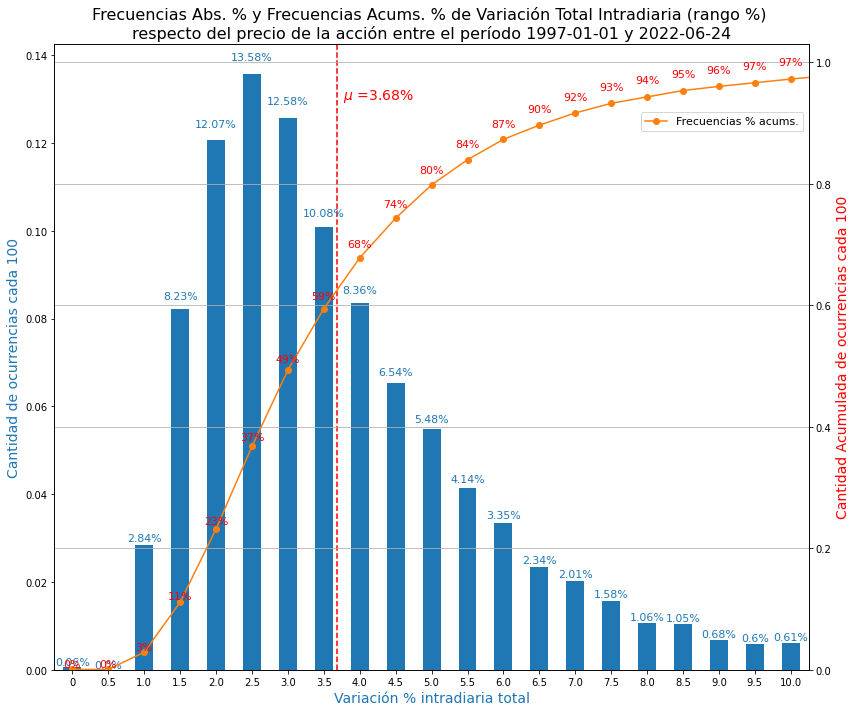

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

def crear_intervalos(xmin, xmax):
  intervalos = []
  i = xmin
  while i <= xmax:
    intervalos.append(i)
    i += 0.5
  return intervalos


def agregar_etiquetas(x_value, y_value, y_label,color):
    for i in range(1, len(x_value)+1):
        ax.text(i-1, (y_value[i-1]) * 1.02, y_label[i-1], ha="center", va='bottom', color=color, fontdict={'size':11})


fig = plt.figure(figsize=(12,10))
ax = fig.subplots()

xmin = -0.5
xmax = 20.5

# Creamos el gráfico de barras y sus correspondientes etiquetas
ax.bar(df_vars.index, values_freq, width=0.5, color='C0', label=f'Frecuencias abs.')
ax.set_xlabel('Variación % intradiaria total', fontdict={'size':14, 'color':'C0'})
ax.set_ylabel('Cantidad de ocurrencias cada 100', fontdict={'size':14, 'color':'C0'})

ax.axvline(mu*2 + (0), color='r', linestyle='--', label=f'Media: {round(mu, 2)}%')
ax.text(mu*2*1.025, 0.13, f'$\mu$ ={round(mu, 2)}%', fontdict={'size':14, 'color':'r'})

x_value = crear_intervalos(0, 10)
y_value = values_freq.tolist()[:21]

y_label = np.round(values_freq*100, decimals=2).tolist()[:21]
for i in range(len(y_label)):
  y_label[i] = str(y_label[i]) + '%'

agregar_etiquetas(x_value, y_value, y_label, 'C0')


# Creamos el gráfico de curva con las variaciones acumuladas
ax = ax.twinx()

ax.plot(df_vars.index, values_acum, color='C1', marker='o', ms=6, label=f'Frecuencias % acums.')
ax.set_ylabel('Cantidad Acumulada de ocurrencias cada 100', fontdict={'size':14, 'color':'r'})

x_value = crear_intervalos(0, 10)
y_value = values_acum.tolist()[:21]
y_label = np.round(values_acum*100, decimals=0).tolist()[:21]
for i in range(len(y_label)):
  y_label[i] = str(y_label[i]).split('.')[0] + '%'

agregar_etiquetas(x_value, y_value, y_label, 'r')


plt.xlim(0,10)
plt.ylim(0,10)
# axis: x0,x1,y0, y1
plt.axis([xmin, xmax, 0, 1.03])
plt.grid(True)

ax.set_title(f"Frecuencias Abs. % y Frecuencias Acums. % de Variación Total Intradiaria (rango %) \nrespecto del precio de la acción entre el período {FECHA_INICIO_MUESTRA} y {df['fecha_date'][len(df) - 1].strftime('%Y-%m-%d')}", fontdict={'size':16})
ax.legend(loc="upper right", bbox_to_anchor=(1, 0.9), prop={'size': 11})

fig.tight_layout()
plt.savefig('plot_1_ggal_vars_intra.jpg', dpi=300)
plt.show()

# Conclusiones

## Rango Porcentual Intradiario Total

Basados en que se busca generar información útil para el trading intradiario de acciones y, como podemos ver en la tabla de Frecuencias Acumuladas y el Gráfico a continuación, los datos nos expresan lo siguiente:

> 1) La variación porcentual intradiaria total con mayor frecuencia de ocurrencia es 2.5%, respecto del precio de apertura.


> 2) El valor de la Media de las distintas variaciones porcentuales intradiarias totales, respecto del precio de apertura, es de 3.68%.

> 3) El valor de la Media representa casi el 60% de las variaciones porcentuales intradiarias totales ocurridas en el período de la muestra.


<img src="https://raw.githubusercontent.com/JonatanSiracusa/Grupo_Financiero_Galicia_Intraday_Percentage_Change/main/plot_1_ggal_vars_intra.jpg" width=800>


## Información útil para el Trader

Quienes realizan "trading intradiario" necesitan que el precio de las acciones tengan volatilidad. Pero no solo volatilidad, sino también amplitud en los movimientos de precio.

Una de las tantas utilidades de las mencionadas conclusiones es visualizar el potencial de la acción analizada para realizar trading intradiario, el cual no es posible percibir a través del valor de la Volatilidad Histórica, ya que ésta última no contempla la amplitud de los movimientos del precio.

Como puede observarse en el gráfico y las conclusiones remarcadas, más de un 59% de las variaciones porcentuales que el precio de la acción realiza en una rueda se encuentran en el rango de un 3.68% respecto del precio de apertura, ya sea con tendencia alcista, bajista o lateral.

Esto sugiere que la acción de Grupo Financiero Galicia pudiese llegar a ser un instrumento conveniente para realizar trading intradiario, aunque esto queda a total criterio, voluntad y "talento" del operador.

Por último, se sugiere realizar mayores estudios con el fin de determinar cómo se comporta la variable analizada en los distintos tipos de mercados (alcista, bajista y lateral), y no solo la variacion porcentual intradiaria total, sino también un estudio similar con las variaciones hacia los mínimos y máximos intradiarios, y sus probabilidades.

